In [2]:
import sys
print(sys.version)

2.7.12 |Anaconda 4.1.1 (x86_64)| (default, Jul  2 2016, 17:43:17) 
[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]


In [3]:
import sklearn
sklearn.__version__

'0.18'

In [4]:
import numpy as np
from sklearn.datasets import load_breast_cancer

In [5]:
data = load_breast_cancer()

In [6]:
X = data.data

In [7]:
noise = np.random.randn(X.shape[0],X.shape[0])

In [8]:
X = np.hstack([X,noise])

In [9]:
Y = data.target

In [10]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [11]:
lr = LR(C=1.0)
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
lr.score(X_test, Y_test)

0.92307692307692313

In [13]:
from sklearn.metrics import precision_score,recall_score

In [14]:
precision = precision_score(Y_test, lr.predict(X_test),pos_label=1)
recall = recall_score(Y_test, lr.predict(X_test),pos_label=1)
print(precision)
print(recall)

0.913043478261
0.965517241379


In [15]:
lr.classes_

array([0, 1])

In [16]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, lr.predict_proba(X_test)[:,1],pos_label=1)

/Users/Ke/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


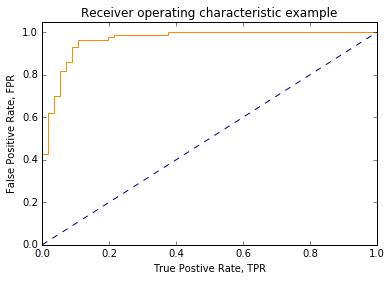

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Postive Rate, TPR')
plt.ylabel('True Positive Rate, FPR')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [18]:
# Control of Model Complexity
from sklearn.model_selection import cross_val_score
import numpy as np
scores = []
for C in 10.**np.arange(-5,5,0.5):
    lr = LR(C=C)
    scores.append(cross_val_score(lr, X, Y, cv=5).mean())
    print "lambda: ",1./C
    print "Accuracy: ",scores[-1]
#     lr.fit(X_train, Y_train)
#     scores.append(lr.score(X_test, Y_test))


lambda:  100000.0
Accuracy:  0.908549442093
lambda:  31622.7766017
Accuracy:  0.913889957676
lambda:  10000.0
Accuracy:  0.920908041554
lambda:  3162.27766017
Accuracy:  0.922677953059
lambda:  1000.0
Accuracy:  0.922739515198
lambda:  316.227766017
Accuracy:  0.922708734129
lambda:  100.0
Accuracy:  0.922739515198
lambda:  31.6227766017
Accuracy:  0.917460561755
lambda:  10.0
Accuracy:  0.91572143132
lambda:  3.16227766017
Accuracy:  0.913951519815
lambda:  1.0
Accuracy:  0.912181608311
lambda:  0.316227766017
Accuracy:  0.912181608311
lambda:  0.1
Accuracy:  0.913920738746
lambda:  0.0316227766017
Accuracy:  0.913920738746
lambda:  0.01
Accuracy:  0.913920738746
lambda:  0.00316227766017
Accuracy:  0.913920738746
lambda:  0.001
Accuracy:  0.913920738746
lambda:  0.000316227766017
Accuracy:  0.913920738746
lambda:  0.0001
Accuracy:  0.913920738746
lambda:  3.16227766017e-05
Accuracy:  0.913920738746


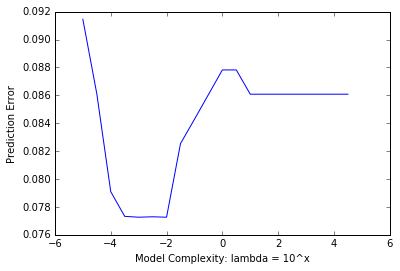

In [20]:
plt.plot(np.arange(-5,5,0.5),1-np.array(scores))
plt.xlabel("Model Complexity: lambda = 10^x")
plt.ylabel("Prediction Error")
# compare to theory class, slide "model complexity", 
# it is the test error change with model complexity